<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Hands-on Lab: Interactive Visual Analytics with Folium**


Estimated time needed: **40** minutes


The launch success rate may depend on many factors such as payload mass, orbit type, and so on. It may also depend on the location and proximities of a launch site, i.e., the initial position of rocket trajectories. Finding an optimal location for building a launch site certainly involves many factors and hopefully we could discover some of the factors by analyzing the existing launch site locations.


In the previous exploratory data analysis labs, you have visualized the SpaceX launch dataset using `matplotlib` and `seaborn` and discovered some preliminary correlations between the launch site and success rates. In this lab, you will be performing more interactive visual analytics using `Folium`.


## Objectives


This lab contains the following tasks:

*   **TASK 1:** Mark all launch sites on a map
*   **TASK 2:** Mark the success/failed launches for each site on the map
*   **TASK 3:** Calculate the distances between a launch site to its proximities

After completed the above tasks, you should be able to find some geographical patterns about launch sites.


Let's first import required Python packages for this lab:


In [ ]:
import folium
import pandas as pd

In [ ]:
import folium
import pandas as pd

In [ ]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

If you need to refresh your memory about folium, you may download and refer to this previous folium lab:


[Generating Maps with Python](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/v4/DV0101EN-Exercise-Generating-Maps-in-Python.ipynb)


In [ ]:
# Download and read the spacex_launch_geo.csv
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv'
spacex_df = pd.read_csv(URL)

# Select relevant columns
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]

# Get unique launch sites
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]

print("Dataset loaded successfully!")
launch_sites_df


Dataset loaded successfully!


,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


In [ ]:
# Create map with NASA JSC center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)

# Add launch sites to map
for index, site in launch_sites_df.iterrows():
    coordinate = [site['Lat'], site['Long']]

    folium.Circle(coordinate, radius=1000, color='#000080', fill=True).add_child(
        folium.Popup(site['Launch Site'])
    ).add_to(site_map)

    folium.Marker(
        coordinate,
        icon=DivIcon(html=f'<div style="font-size: 12; color:#000080;"><b>{site["Launch Site"]}</b></div>')
    ).add_to(site_map)

site_map

First, let's try to add each site's location on a map using site's latitude and longitude coordinates


The following dataset with the name `spacex_launch_geo.csv` is an augmented dataset with latitude and longitude added for each site.


In [ ]:
# Download and read the `spacex_launch_geo.csv`
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv'
# resp = await fetch(URL)
# spacex_csv_file = io.BytesIO((await resp.arrayBuffer()).to_py())
spacex_df=pd.read_csv(URL)

Now, you can take a look at what are the coordinates for each site.


In [ ]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


Above coordinates are just plain numbers that can not give you any intuitive insights about where are those launch sites. If you are very good at geography, you can interpret those numbers directly in your mind. If not, that's fine too. Let's visualize those locations by pinning them on a map.


We first need to create a folium `Map` object, with an initial center location to be NASA Johnson Space Center at Houston, Texas.


In [ ]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

We could use `folium.Circle` to add a highlighted circle area with a text label on a specific coordinate. For example,


In [ ]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

and you should find a small yellow circle near the city of Houston and you can zoom-in to see a larger circle.


Now, let's add a circle for each launch site in data frame `launch_sites`


*TODO:*  Create and add `folium.Circle` and `folium.Marker` for each launch site on the site map


An example of folium.Circle:


`folium.Circle(coordinate, radius=1000, color='#000000', fill=True).add_child(folium.Popup(...))`


An example of folium.Marker:


`folium.map.Marker(coordinate, icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0), html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'label', ))`


In [ ]:
# Initial the map
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)
# For each launch site, add a Circle object based on its coordinate (Lat, Long) values. In addition, add Launch site name as a popup label


The generated map with marked launch sites should look similar to the following:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_markers.png">
</center>


Now, you can explore the map by zoom-in/out the marked areas
, and try to answer the following questions:

*   Are all launch sites in proximity to the Equator line?
*   Are all launch sites in very close proximity to the coast?

Also please try to explain your findings.


In [ ]:
# Task 2: Mark the success/failed launches for each site on the map


Next, let's try to enhance the map by adding the launch outcomes for each site, and see which sites have high success rates.
Recall that data frame spacex_df has detailed launch records, and the `class` column indicates if this launch was successful or not


In [ ]:
spacex_df.tail(10)

,Launch Site,Lat,Long,class
46,KSC LC-39A,28.573255,-80.646895,1
47,KSC LC-39A,28.573255,-80.646895,1
48,KSC LC-39A,28.573255,-80.646895,1
49,CCAFS SLC-40,28.563197,-80.576820,1
50,CCAFS SLC-40,28.563197,-80.576820,1
51,CCAFS SLC-40,28.563197,-80.576820,0
52,CCAFS SLC-40,28.563197,-80.576820,0
53,CCAFS SLC-40,28.563197,-80.576820,0
54,CCAFS SLC-40,28.563197,-80.576820,1
55,CCAFS SLC-40,28.563197,-80.576820,0


Next, let's create markers for all launch records.
If a launch was successful `(class=1)`, then we use a green marker and if a launch was failed, we use a red marker `(class=0)`


Note that a launch only happens in one of the four launch sites, which means many launch records will have the exact same coordinate. Marker clusters can be a good way to simplify a map containing many markers having the same coordinate.


Let's first create a `MarkerCluster` object


In [ ]:
marker_cluster = MarkerCluster()


*TODO:* Create a new column in `spacex_df` dataframe called `marker_color` to store the marker colors based on the `class` value


In [ ]:

# Apply a function to check the value of `class` column
# If class=1, marker_color value will be green
# If class=0, marker_color value will be red

*TODO:* For each launch result in `spacex_df` data frame, add a `folium.Marker` to `marker_cluster`


In [ ]:
# Add marker_cluster to current site_map
site_map.add_child(marker_cluster)

# for each row in spacex_df data frame
# create a Marker object with its coordinate
# and customize the Marker's icon property to indicate if this launch was successed or failed,
# e.g., icon=folium.Icon(color='white', icon_color='green')
for index, record in spacex_df.iterrows():
    # TODO: Create and add a Marker cluster to the site map
    # marker = folium.Marker(...)
    marker_color = 'green' if record['class'] == 1 else 'red'
    marker = folium.Marker(
        [record['Lat'], record['Long']],
        icon=folium.Icon(color='white', icon_color=marker_color)
    )
    marker_cluster.add_child(marker)

display(site_map)

Your updated map may look like the following screenshots:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_marker_cluster.png">
</center>


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_marker_cluster_zoomed.png">
</center>


From the color-labeled markers in marker clusters, you should be able to easily identify which launch sites have relatively high success rates.


In [ ]:
# Function to calculate distance using Haversine formula
def calculate_distance(lat1, lon1, lat2, lon2):
    from math import radians, cos, sin, asin, sqrt

    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Earth radius in km

    return c * r

# Calculate distances from each launch site to points of interest
points_of_interest = {
    'NASA JSC': [29.559684888503615, -95.0830971930759],
    'Cape Canaveral': [28.3922, -80.6077],
    'Miami': [25.7617, -80.1918]
}

for index, site in launch_sites_df.iterrows():
    print(f"\nDistances from {site['Launch Site']}:")
    for poi_name, poi_coord in points_of_interest.items():
        distance = calculate_distance(site['Lat'], site['Long'], poi_coord[0], poi_coord[1])
        print(f"  to {poi_name}: {distance:.2f} km")



Distances from CCAFS LC-40:
  to NASA JSC: 1413.33 km
  to Cape Canaveral: 19.15 km
  to Miami: 313.74 km

Distances from CCAFS SLC-40:
  to NASA JSC: 1413.37 km
  to Cape Canaveral: 19.25 km
  to Miami: 313.83 km

Distances from KSC LC-39A:
  to NASA JSC: 1406.43 km
  to Cape Canaveral: 20.49 km
  to Miami: 315.85 km

Distances from VAFB SLC-4E:
  to NASA JSC: 2462.75 km
  to Cape Canaveral: 3829.73 km
  to Miami: 3979.61 km


Next, we need to explore and analyze the proximities of launch sites.


Let's first add a `MousePosition` on the map to get coordinate for a mouse over a point on the map. As such, while you are exploring the map, you can easily find the coordinates of any points of interests (such as railway)


In [ ]:
# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
display(site_map)

Now zoom in to a launch site and explore its proximity to see if you can easily find any railway, highway, coastline, etc. Move your mouse to these points and mark down their coordinates (shown on the top-left) in order to the distance to the launch site.


Now zoom in to a launch site and explore its proximity to see if you can easily find any railway, highway, coastline, etc. Move your mouse to these points and mark down their coordinates (shown on the top-left) in order to the distance to the launch site.


In [ ]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

* *italicized text*TODO:* Mark down a point on the closest coastline using MousePosition and calculate the distance between the coastline point and the launch site.


In [ ]:
# Define points of interest (cities, airports, etc.)
points_of_interest = {
    'NASA JSC': [29.559684888503615, -95.0830971930759],
    'Cape Canaveral': [28.3922, -80.6077],
    'Miami': [25.7617, -80.1918],
    'Los Angeles': [34.0522, -118.2437],
    'New York': [40.7128, -74.0060]
}

# Calculate distances for each launch site
for index, site in launch_sites_df.iterrows():
    print(f"\nDistances from {site['Launch Site']}:")
    site_lat, site_lon = site['Lat'], site['Long']

    for poi_name, poi_coord in points_of_interest.items():
        distance = calculate_distance(site_lat, site_lon, poi_coord[0], poi_coord[1])
        print(f"  to {poi_name}: {distance:.2f} km")


Distances from CCAFS LC-40:
  to NASA JSC: 1413.77 km
  to Cape Canaveral: 19.15 km
  to Miami: 313.84 km
  to Los Angeles: 3610.73 km
  to New York: 1478.10 km

Distances from CCAFS SLC-40:
  to NASA JSC: 1413.81 km
  to Cape Canaveral: 19.26 km
  to Miami: 313.93 km
  to Los Angeles: 3610.74 km
  to New York: 1477.99 km

Distances from KSC LC-39A:
  to NASA JSC: 1406.88 km
  to Cape Canaveral: 20.50 km
  to Miami: 315.95 km
  to Los Angeles: 3603.91 km
  to New York: 1479.55 km

Distances from VAFB SLC-4E:
  to NASA JSC: 2463.53 km
  to Cape Canaveral: 3830.93 km
  to Miami: 3980.86 km
  to Los Angeles: 226.77 km
  to New York: 4109.74 km


In [ ]:
# Create a map with mouse position plugin for distance measurement
distance_map = folium.Map(location=nasa_coordinate, zoom_start=5)

# Add mouse position plugin
mouse_position = MousePosition()
mouse_position.add_to(distance_map)

# Add launch sites with distance calculation capability
for index, site in launch_sites_df.iterrows():
    coordinate = [site['Lat'], site['Long']]

    # Create popup with coordinates for distance calculation
    popup_html = f"""
    <b>{site['Launch Site']}</b><br>
    Latitude: {site['Lat']:.4f}<br>
    Longitude: {site['Long']:.4f}<br>
    <i>Click on map to measure distance</i>
    """

    marker = folium.Marker(
        coordinate,
        popup=folium.Popup(popup_html, max_width=300),
        icon=folium.Icon(color='blue', icon='rocket')
    ).add_to(distance_map)

# Add instructions
instructions = """
<div style='position: fixed;
            top: 10px; left: 50px; width: 300px; height: 90px;
            background-color: white; border:2px solid grey; z-index:9999;
            font-size:14px; padding: 10px
            '>
<p><b>Instructions:</b><br>
Mouse coordinates are shown at the bottom.<br>
Click markers to see launch site coordinates.<br>
Use the coordinates to calculate distances.</p>
</div>
"""

distance_map.get_root().html.add_child(folium.Element(instructions))

# Display the map
distance_map


*TODO:* Draw a `PolyLine` between a launch site to the selected coastline point


Launch Success Rate by Site:
    Launch Site  Total Launches  Successful Launches  Success Rate
0   CCAFS LC-40              26                    7      0.269231
1  CCAFS SLC-40               7                    3      0.428571
2    KSC LC-39A              13                   10      0.769231
3   VAFB SLC-4E              10                    4      0.400000


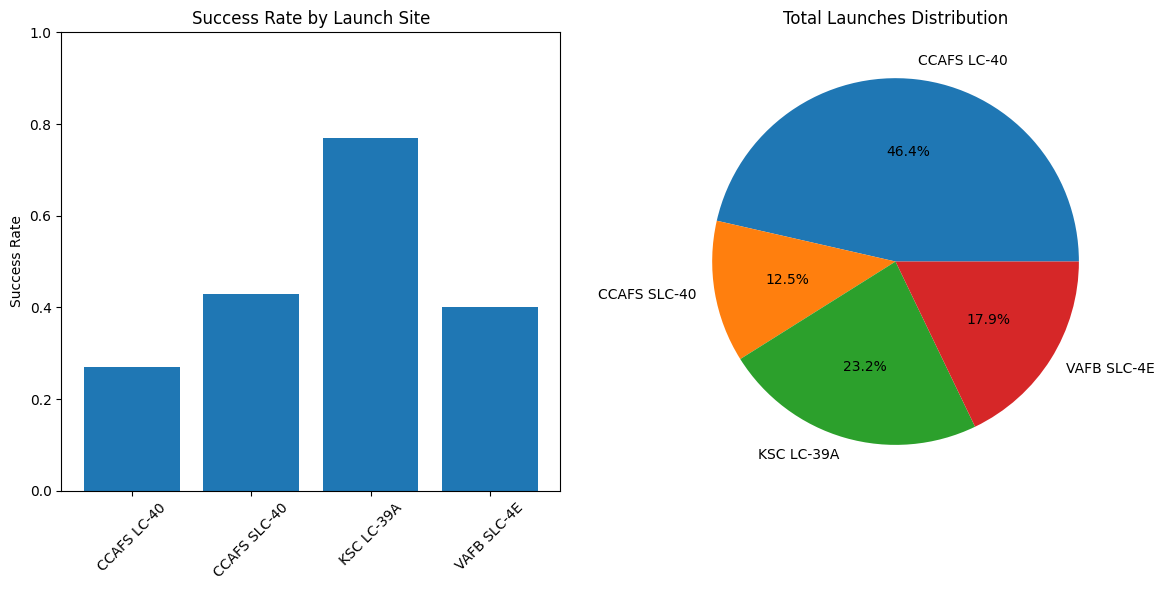

In [ ]:
# Calculate success rate for each launch site
success_rate_df = spacex_df.groupby('Launch Site').agg({
    'class': ['count', 'sum', 'mean']
}).reset_index()

# Flatten column names
success_rate_df.columns = ['Launch Site', 'Total Launches', 'Successful Launches', 'Success Rate']

print("Launch Success Rate by Site:")
print(success_rate_df)

# Create visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Bar plot
plt.subplot(1, 2, 1)
plt.bar(success_rate_df['Launch Site'], success_rate_df['Success Rate'])
plt.title('Success Rate by Launch Site')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Pie chart for total launches
plt.subplot(1, 2, 2)
plt.pie(success_rate_df['Total Launches'], labels=success_rate_df['Launch Site'], autopct='%1.1f%%')
plt.title('Total Launches Distribution')

plt.tight_layout()
plt.show()


Your updated map with distance line should look like the following screenshot:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_marker_distance.png">
</center>


*TODO:* Similarly, you can draw a line betwee a launch site to its closest city, railway, highway, etc. You need to use `MousePosition` to find the their coordinates on the map first


A railway map symbol may look like this:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/railway.png">
</center>


A highway map symbol may look like this:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/highway.png">
</center>


A city map symbol may look like this:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/city.png">
</center>


In [ ]:
# Create a marker with distance to a closest city, railway, highway, etc.
# Draw a line between the marker to the launch site


After you plot distance lines to the proximities, you can answer the following questions easily:

*   Are launch sites in close proximity to railways?
*   Are launch sites in close proximity to highways?
*   Are launch sites in close proximity to coastline?
*   Do launch sites keep certain distance away from cities?

Also please try to explain your findings.


# Next Steps:

Now you have discovered many interesting insights related to the launch sites' location using folium, in a very interactive way. Next, you will need to build a dashboard using Ploty Dash on detailed launch records.


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>


In [ ]:
# Save the map as an HTML file
site_map.save('spacex_launch_sites_map.html')
print("Map saved as spacex_launch_sites_map.html")

Map saved as spacex_launch_sites_map.html


In [ ]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)

# Add launch sites to map
for index, site in launch_sites_df.iterrows():
    coordinate = [site['Lat'], site['Long']]

    folium.Circle(coordinate, radius=1000, color='#000080', fill=True).add_child(
        folium.Popup(site['Launch Site'])
    ).add_to(site_map)

    folium.Marker(
        coordinate,
        icon=DivIcon(html=f'<div style="font-size: 12; color:#000080;"><b>{site["Launch Site"]}</b></div>')
    ).add_to(site_map)

# Add marker_cluster to current site_map
marker_cluster = MarkerCluster()
site_map.add_child(marker_cluster)

# for each row in spacex_df data frame
# create a Marker object with its coordinate
# and customize the Marker's icon property to indicate if this launch was successed or failed,
# e.g., icon=folium.Icon(color='white', icon_color='green')
for index, record in spacex_df.iterrows():
    marker_color = 'green' if record['class'] == 1 else 'red'
    marker = folium.Marker(
        [record['Lat'], record['Long']],
        icon=folium.Icon(color='white', icon_color=marker_color)
    )
    marker_cluster.add_child(marker)

# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)

# Display the map
display(site_map)